## **NLP PROJECT**
### **PART 1 : SINGLE OUTPUT**

### **I. PREPROCESSING**

In [182]:
# Importing useful libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re

In [205]:
# Connecting with the drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [333]:
# Importing the dataset from csv
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJETS/Projet - NLP.csv")
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [334]:
print('key words value counts :\n',dataset.keyword.value_counts(),'\n')

print('location value counts :\n',dataset.location.value_counts(),'\n')

key words value counts :
 fatalities               45
deluge                   42
armageddon               42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64 

location value counts :
 USA                               104
New York                           71
United States                      50
London                             45
Canada                             29
                                 ... 
Manchester UK                       1
somewhere in cali                   1
Photo : Blue Mountains              1
Gander NF                           1
The Shady Hyenatown of Finland      1
Name: location, Length: 3341, dtype: int64 



In [335]:
# Looking at NaN values

dataset.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [336]:
# Checking statistics informations, we can see that there are sentences in the text columns that are not unique

dataset.describe(include = 'all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [337]:
# Keeping only the text and target columns

dataset = dataset.loc[:, ["keyword","text", "target"]]
dataset.head()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [358]:
def no_hastags(text):
  #if len(text) == 0:
    #res = "no hashtag"
  #else:
  res = " ".join(text)
  return res

In [359]:
# Adding a Hastag columns

dataset["hashtags"] = dataset["text"].apply(lambda x : re.findall('#[A-Za-z1-9]+' , x))
dataset["hashtags"] = dataset["hashtags"].apply(lambda x : no_hastags(x))
dataset.head()

,keyword,text,target,hashtags
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,#earthquake
1,NaN,Forest fire near La Ronge Sask. Canada,1,
2,NaN,All residents asked to 'shelter in place' are ...,1,
3,NaN,"13,000 people receive #wildfires evacuation or...",1,#wildfires
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,#Alaska #wildfires


In [360]:
# Splitting the dataset
df_text = dataset.loc[:, ["text", "target", "hashtags"]]
df_text.head()

,text,target,hashtags
0,Our Deeds are the Reason of this #earthquake M...,1,#earthquake
1,Forest fire near La Ronge Sask. Canada,1,
2,All residents asked to 'shelter in place' are ...,1,
3,"13,000 people receive #wildfires evacuation or...",1,#wildfires
4,Just got sent this photo from Ruby #Alaska as ...,1,#Alaska #wildfires



**PREPROCESSING WITH SPACY**

In [215]:
!pip install spacy -q
import spacy
!python -m spacy download en_core_web_sm -q

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [216]:
# Importing English using en_core_web_sm.load()
import en_core_web_sm
nlp = en_core_web_sm.load()

In [217]:
# Importing Stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [361]:
# Building a function that will delete the url in text
def delete_url(text):
  list_no_url = []
  res = text.split()
  for word in res:
    if "http" not in word:
      list_no_url.append(word)
  res = " ".join(list_no_url)

  return(res)

In [362]:
# Cleaning text before training: keeping only alpha numerical text as well as deleting web url 
df_text["text_clean"] = df_text["text"].apply(lambda x : delete_url(x))
df_text["text_clean"] = df_text["text_clean"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
df_text["text_clean"] = df_text["text_clean"].apply(lambda x : x.replace(" +", " ").lower().strip())
df_text["hashtags_clean"] = df_text["hashtags"].str.replace("#","")
df_text.head()

,text,target,hashtags,text_clean,hashtags_clean
0,Our Deeds are the Reason of this #earthquake M...,1,#earthquake,our deeds are the reason of this earthquake ma...,earthquake
1,Forest fire near La Ronge Sask. Canada,1,,forest fire near la ronge sask canada,
2,All residents asked to 'shelter in place' are ...,1,,all residents asked to shelter in place are be...,
3,"13,000 people receive #wildfires evacuation or...",1,#wildfires,13000 people receive wildfires evacuation orde...,wildfires
4,Just got sent this photo from Ruby #Alaska as ...,1,#Alaska #wildfires,just got sent this photo from ruby alaska as s...,Alaska wildfires


In [363]:
# Building a lemmatizing function
def lemmatize_text(text):
  text = nlp(text)
  lemma = " ".join([token.lemma_ for token in text if token.text not in STOP_WORDS])
  return lemma

In [364]:
# Lemmatizing text
df_text["text_clean"] = df_text["text_clean"].apply(lambda x : lemmatize_text(x))
df_text.head()

,text,target,hashtags,text_clean,hashtags_clean
0,Our Deeds are the Reason of this #earthquake M...,1,#earthquake,deed reason earthquake allah forgive,earthquake
1,Forest fire near La Ronge Sask. Canada,1,,forest fire near la ronge sask canada,
2,All residents asked to 'shelter in place' are ...,1,,resident ask shelter place notify officer evac...,
3,"13,000 people receive #wildfires evacuation or...",1,#wildfires,13000 people receive wildfire evacuation order...,wildfires
4,Just got sent this photo from Ruby #Alaska as ...,1,#Alaska #wildfires,get send photo ruby alaska smoke wildfire pour...,Alaska wildfires


In [365]:
# Encoding the tweets
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df_text["text_clean"])
df_text["text_encoded"] = tokenizer.texts_to_sequences(df_text["text_clean"])
df_text["len_text"] = df_text["text_clean"].apply(lambda x : len(x))
df_text = df_text[df_text["len_text"] != 0]
df_text.head()

,text,target,hashtags,text_clean,hashtags_clean,text_encoded,len_text
0,Our Deeds are the Reason of this #earthquake M...,1,#earthquake,deed reason earthquake allah forgive,earthquake,"[3700, 412, 178, 1276, 1977]",36
1,Forest fire near La Ronge Sask. Canada,1,,forest fire near la ronge sask canada,,"[121, 3, 165, 524, 5556, 5557, 983]",37
2,All residents asked to 'shelter in place' are ...,1,,resident ask shelter place notify officer evac...,,"[1396, 462, 1729, 339, 5558, 304, 185, 1729, 3...",79
3,"13,000 people receive #wildfires evacuation or...",1,#wildfires,13000 people receive wildfire evacuation order...,wildfires,"[2350, 10, 2351, 75, 185, 305, 39]",57
4,Just got sent this photo from Ruby #Alaska as ...,1,#Alaska #wildfires,get send photo ruby alaska smoke wildfire pour...,Alaska wildfires,"[9, 186, 125, 5559, 1730, 179, 75, 2352, 107]",53


In [366]:
# Shuffling text
df_text = df_text.sample(len(df_text))
df_text.head()

,text,target,hashtags,text_clean,hashtags_clean,text_encoded,len_text
4358,San Jose Mercury: Governor Brown allows parole...,0,,san jose mercury governor brown allow parole c...,,"[1251, 4549, 3290, 980, 486, 556, 864, 39, 107...",75
6348,CAP: 'the DRIVE Act represents the failure of ...,0,,cap drive act represent failure senate republi...,,"[3534, 236, 561, 4046, 257, 2660, 1627, 1898, ...",105
3295,Fire crews evacuate passengers from a Gold Coa...,1,#TenNews,fire crew evacuate passenger gold coast tram t...,TenNews,"[3, 478, 88, 724, 1034, 905, 1390, 218, 1709, ...",87
4644,@yahoocare perhaps you should change you name ...,0,,yahoocare change yahoo not care inundated comp...,,"[12049, 148, 3211, 1, 357, 12050, 3303, 826]",59
513,TV program I saw said US air plane flew to ura...,1,,tv program see say air plane fly uranium fukus...,,"[582, 1064, 81, 46, 248, 345, 949, 3886, 708, ...",86


In [367]:
# Adding zero padding at the end of the sentences
text_pad = tf.keras.preprocessing.sequence.pad_sequences(df_text["text_encoded"], padding = "post")

In [368]:
# Creating a tensort dataset
full_ds = tf.data.Dataset.from_tensor_slices((text_pad, df_text["target"].values))

### **II. TRAIN TEST SPLIT PROCESSING**

In [369]:
# Splitting in train set and test set then shuffling and batching
take_size = int(df_text.shape[0] * 0.8)

train_data = full_ds.take(take_size)
test_data = full_ds.skip(take_size)

train_data = train_data.shuffle(len(train_data)).batch(16)
test_data = test_data.shuffle(len(test_data)).batch(16)

In [410]:
# Looking at a batch
for text, target in train_data.take(1):
  print(text)
  print(target)

tf.Tensor(
[[ 2267   114   435   660  1629   971   592    44 11836 11837  2802     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [12128   403   290     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [14360  2107  3462   488   200    79   198   452    13    59     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  312   804  5504  2185   456  1806    80     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 2188   216   403  1114   133   547  1118 14553   186   623  1096  2188
    763 14554     0     0     0     0     0     0     0     0     0     0
      0]
 [   76     2    87  3662   723     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [11502 11503 11504 11505     0     0     0    

### **III. MODELING**

In [371]:
# Looking at the size of the vocabulary
vocab_size = len(tokenizer.word_index)
vocab_size

15749

**1) MODEL N°1**

In [372]:
# Building the model
from tensorflow.keras.layers import Embedding, Flatten, Dense, Conv1D, Dropout

model_1 = tf.keras.Sequential([
                             Embedding(vocab_size + 1, 64, input_shape=[text.shape[1],]),
                             Conv1D(16, 3, activation="relu"),
                             Flatten(),
                             Dense(64, activation='relu'),
                             Dropout(0.2),
                             Dense(32, activation='relu'),
                             Dense(16, activation='relu'),
                             Dropout(0.2),
                             Dense(8, activation='relu'),
                             Dense(1, activation="sigmoid")
                  ])

In [373]:
# Looking at the summary of our model
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 25, 64)            1008000   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 23, 16)            3088      
_________________________________________________________________
flatten_11 (Flatten)         (None, 368)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 64)                23616     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_97 (Dense)             (None, 16)              

In [354]:
# Creating a schedule learning rate
initial_lr = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps = 30,
    decay_rate = 0.96,
    staircase = True
)

In [355]:
# Creating a compiler 
model_1.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = [tf.keras.metrics.BinaryAccuracy()])

In [356]:
# Training the model
history_1 = model_1.fit(train_data, epochs = 20, validation_data = test_data)

Epoch 1/20
381/381 [==============================] - 6s 15ms/step - loss: 0.6880 - binary_accuracy: 0.5677 - val_loss: 0.6803 - val_binary_accuracy: 0.5529
Epoch 2/20
381/381 [==============================] - 6s 15ms/step - loss: 0.6727 - binary_accuracy: 0.5747 - val_loss: 0.6690 - val_binary_accuracy: 0.5529
Epoch 3/20
381/381 [==============================] - 6s 14ms/step - loss: 0.6603 - binary_accuracy: 0.5735 - val_loss: 0.6594 - val_binary_accuracy: 0.5529
Epoch 4/20
381/381 [==============================] - 6s 14ms/step - loss: 0.6456 - binary_accuracy: 0.5885 - val_loss: 0.6516 - val_binary_accuracy: 0.5601
Epoch 5/20
381/381 [==============================] - 6s 15ms/step - loss: 0.6317 - binary_accuracy: 0.6000 - val_loss: 0.6460 - val_binary_accuracy: 0.6087
Epoch 6/20
381/381 [==============================] - 6s 15ms/step - loss: 0.6270 - binary_accuracy: 0.6288 - val_loss: 0.6429 - val_binary_accuracy: 0.6185
Epoch 7/20
381/381 [==============================] - 6s 1

In [391]:
# Viewing a prediction 
for example, target in test_data.take(1):
  print(tokenizer.sequences_to_texts(example.numpy())[0])
  print("Prediction : {}".format((model_1.predict(example)[0] > 0.5).astype("int32")))
  print("Real: {}".format(target[0]))

gov brown allow parole 1976 chowchilla school bus hijacker james schoenfeld
Prediction : [1]
Real: 0


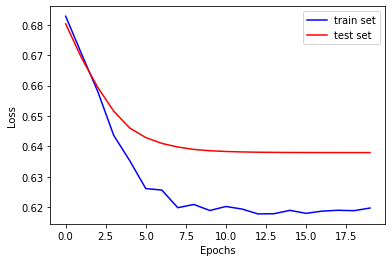

In [392]:
import matplotlib.pyplot as plt

# Visualizing the training process on the loss function 
plt.plot(history_1.history["loss"], color="b", label = "train set")
plt.plot(history_1.history["val_loss"], color="r", label = "test set")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

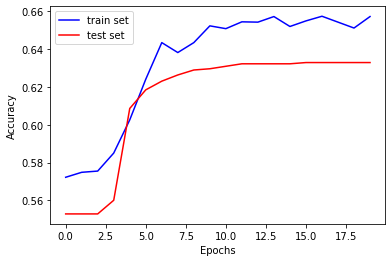

In [393]:
# Visualizing of the training process on the accuracy fonction
plt.plot(history_1.history["binary_accuracy"], color="b", label = "train set" )
plt.plot(history_1.history["val_binary_accuracy"], color="r", label = "test set")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

**2) MODEL N°2**

In [394]:
# Building the model
from tensorflow.keras.layers import Bidirectional, LSTM,TimeDistributed, Dropout

model_2 = tf.keras.Sequential([
                             Embedding(vocab_size + 1, 64, input_shape=[text.shape[1],]),
                             Bidirectional(LSTM(64, return_sequences=True)),
                             Bidirectional(LSTM(64, return_sequences=True)),
                             LSTM(64, return_sequences=True),
                             Dropout(0.05),
                             TimeDistributed(Dense(32,"relu")),  
                             Flatten(),
                             Dropout(0.05),
                             Dense(16, "relu"),
                             Dropout(0.05),
                             Dense(8, "relu"),
                             Dense(1, activation="sigmoid")
                  ])

In [395]:
# Looking at the summary of our model
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 32, 64)            1008000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 32, 128)           66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 32, 128)           98816     
_________________________________________________________________
lstm_68 (LSTM)               (None, 32, 64)            49408     
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 64)            0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 32, 32)            2080      
_________________________________________________________________
flatten_12 (Flatten)         (None, 1024)            

In [396]:
# Creating a compiler 
model_2.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = [tf.keras.metrics.BinaryAccuracy()])

In [ ]:
# Training the model
history_2 = model_2.fit(train_data, epochs = 10, validation_data = test_data)

Epoch 1/10
381/381 [==============================] - 37s 77ms/step - loss: 0.6892 - binary_accuracy: 0.5519 - val_loss: 0.6713 - val_binary_accuracy: 0.5568
Epoch 2/10
381/381 [==============================] - 28s 73ms/step - loss: 0.5562 - binary_accuracy: 0.7192 - val_loss: 0.4891 - val_binary_accuracy: 0.7728
Epoch 3/10
381/381 [==============================] - 28s 73ms/step - loss: 0.3611 - binary_accuracy: 0.8511 - val_loss: 0.5021 - val_binary_accuracy: 0.7754
Epoch 4/10
381/381 [==============================] - 28s 72ms/step - loss: 0.3180 - binary_accuracy: 0.8785 - val_loss: 0.5131 - val_binary_accuracy: 0.7748
Epoch 5/10
381/381 [==============================] - 28s 73ms/step - loss: 0.2810 - binary_accuracy: 0.8922 - val_loss: 0.5248 - val_binary_accuracy: 0.7748
Epoch 6/10
381/381 [==============================] - 28s 73ms/step - loss: 0.2730 - binary_accuracy: 0.8915 - val_loss: 0.5343 - val_binary_accuracy: 0.7754
Epoch 7/10
381/381 [==============================] 

In [ ]:
# Viewing a prediction 
for example, target in test_data.take(1):
  print(tokenizer.sequences_to_texts(example.numpy())[0])
  print("Prediction : {}".format((model_2.predict(example)[0] > 0.5).astype("int32")))
  print("Real: {}".format(target[0]))

mprnews 600 wow s lot traumatise kid
Prediction : [0]
Real: 0


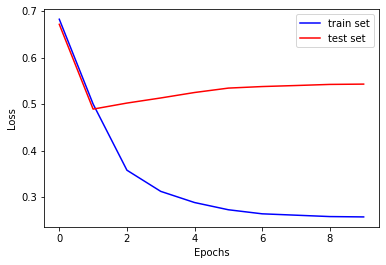

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the training process on the loss function 
plt.plot(history_2.history["loss"], color="b", label = "train set")
plt.plot(history_2.history["val_loss"], color="r", label = "test set")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

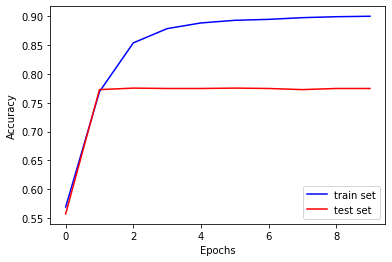

In [ ]:
# Visualizing of the training process on the accuracy fonction
plt.plot(history_2.history["binary_accuracy"], color="b", label = "train set" )
plt.plot(history_2.history["val_binary_accuracy"], color="r", label = "test set")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

**3) MODEL N°3**

In [411]:
# Building the model
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense, GRU

model_3 = tf.keras.Sequential([
                             Embedding(vocab_size + 1, 64, input_shape=[text.shape[1],]),
                             Bidirectional(GRU(64, 'tanh', return_sequences=True, recurrent_initializer='glorot_uniform')),
                             Bidirectional(GRU(64, 'tanh', return_sequences=True, recurrent_initializer='glorot_uniform')),
                             GRU(64, 'tanh', return_sequences=False, recurrent_initializer='glorot_uniform'),
                             Dense(1, activation="sigmoid")
                  ])

In [412]:
# Looking at the summary of our model
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 25, 64)            1008000   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 25, 128)           49920     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 25, 128)           74496     
_________________________________________________________________
gru_8 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 65        
Total params: 1,169,729
Trainable params: 1,169,729
Non-trainable params: 0
_________________________________________________________________


In [413]:
# Creating a compiler 
model_3.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = [tf.keras.metrics.BinaryAccuracy()])

In [414]:
# Training the model
history_3 = model_3.fit(train_data, epochs = 10, validation_data = test_data)

Epoch 1/10
381/381 [==============================] - 35s 74ms/step - loss: 0.6842 - binary_accuracy: 0.5749 - val_loss: 0.6862 - val_binary_accuracy: 0.5594
Epoch 2/10
381/381 [==============================] - 27s 70ms/step - loss: 0.6811 - binary_accuracy: 0.5777 - val_loss: 0.6861 - val_binary_accuracy: 0.5594
Epoch 3/10
381/381 [==============================] - 27s 70ms/step - loss: 0.6852 - binary_accuracy: 0.5605 - val_loss: 0.6851 - val_binary_accuracy: 0.5594
Epoch 4/10
381/381 [==============================] - 27s 70ms/step - loss: 0.6770 - binary_accuracy: 0.5713 - val_loss: 0.6625 - val_binary_accuracy: 0.5680
Epoch 5/10
381/381 [==============================] - 27s 70ms/step - loss: 0.5940 - binary_accuracy: 0.6650 - val_loss: 0.4955 - val_binary_accuracy: 0.7590
Epoch 6/10
381/381 [==============================] - 27s 70ms/step - loss: 0.3984 - binary_accuracy: 0.8305 - val_loss: 0.4886 - val_binary_accuracy: 0.7597
Epoch 7/10
381/381 [==============================] 

In [415]:
# Viewing a prediction 
for example, target in test_data.take(1):
  print(tokenizer.sequences_to_texts(example.numpy())[0])
  print("Prediction : {}".format((model_3.predict(example)[0] > 0.5).astype("int32")))
  print("Real: {}".format(target[0]))

wanna come watch twister toosoon
Prediction : [0]
Real: 0


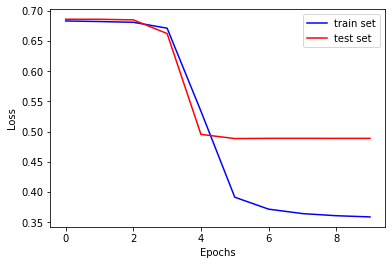

In [416]:
# Visualizing the training process on the loss function 
plt.plot(history_3.history["loss"], color="b", label = "train set")
plt.plot(history_3.history["val_loss"], color="r", label = "test set")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

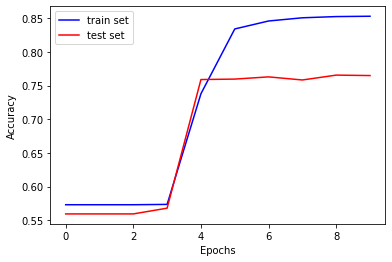

In [417]:
plt.plot(history_3.history["binary_accuracy"], color="b", label = "train set" )
plt.plot(history_3.history["val_binary_accuracy"], color="r", label = "test set")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

### **PART 2 : MULTIPLE OUTPUT**

### **I. PREPROCESSING**

In [374]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.01, max_features=1000)
tfidf_data = vectorizer.fit_transform(df_text["text_clean"])
tfidf_data = tfidf_data.todense()

In [375]:
# Encoding the hastags
tokenizer_hashtags = tf.keras.preprocessing.text.Tokenizer()
tokenizer_hashtags.fit_on_texts(df_text["hashtags_clean"])
df_text["hashtags_encoded"] = tokenizer_hashtags.texts_to_sequences(df_text["hashtags_clean"])
df_text.head()

,text,target,hashtags,text_clean,hashtags_clean,text_encoded,len_text,hashtags_encoded
4358,San Jose Mercury: Governor Brown allows parole...,0,,san jose mercury governor brown allow parole c...,,"[1251, 4549, 3290, 980, 486, 556, 864, 39, 107...",75,[]
6348,CAP: 'the DRIVE Act represents the failure of ...,0,,cap drive act represent failure senate republi...,,"[3534, 236, 561, 4046, 257, 2660, 1627, 1898, ...",105,[]
3295,Fire crews evacuate passengers from a Gold Coa...,1,#TenNews,fire crew evacuate passenger gold coast tram t...,TenNews,"[3, 478, 88, 724, 1034, 905, 1390, 218, 1709, ...",87,[476]
4644,@yahoocare perhaps you should change you name ...,0,,yahoocare change yahoo not care inundated comp...,,"[12049, 148, 3211, 1, 357, 12050, 3303, 826]",59,[]
513,TV program I saw said US air plane flew to ura...,1,,tv program see say air plane fly uranium fukus...,,"[582, 1064, 81, 46, 248, 345, 949, 3886, 708, ...",86,[]


In [376]:
# Adding zero padding at the end of the hashtags
hashtags_pad = tf.keras.preprocessing.sequence.pad_sequences(df_text["hashtags_encoded"], padding = "post")

In [377]:
# Creating a tensort dataset
multiple_ds = tf.data.Dataset.from_tensor_slices((text_pad, tfidf_data,hashtags_pad, df_text["target"].values))

### **II. TRAIN TEST SPLIT PROCESSING**

In [378]:
# Splitting in train set and test set then shuffling and batching
take_size = int(df_text.shape[0] * 0.8)

train_data_multi = multiple_ds.take(take_size)
test_data_multi = multiple_ds.skip(take_size)

train_data_multi = train_data_multi.shuffle(len(train_data_multi)).batch(16)
test_data_multi = test_data_multi.batch(16)

In [379]:
# Looking at a batch
for text_multi, tfidf_sample, hashtags, label in train_data_multi.take(1):
  print(text_multi, tfidf_sample, hashtags, label)

tf.Tensor(
[[   44   601  5287   194  2824   768   108   426     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  426   927   117   752   254   175   125     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   44    63  1582   378   241  1223  5190   950  2778  5191  5192     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 1702    52   287  2691  2247  1702    52  3396  1261   243  3397     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  523     4 14037  1132  4437  3005 14038 14039     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [15307   309   474   614   463   333  5236 15308   143 15309    10    14
   1638     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   52  2074   123  2075  1321  1997  1804    

### **III. MODELING**

In [380]:
vocab_size_hash = len(tokenizer_hastags.word_index)
vocab_size = len(tokenizer.word_index)

# Model for sequences
emb = tf.keras.layers.Embedding(vocab_size+1, 64, input_length=text_multi.shape[1])
lstm1 = tf.keras.layers.LSTM(64, return_sequences=True)
lstm2 = tf.keras.layers.LSTM(32, return_sequences=False)

# Model for hashtags

emb_hash = tf.keras.layers.Embedding(vocab_size_hash+1, 64, input_length=hashtags.shape[1])
lstm1_hash = tf.keras.layers.LSTM(64, return_sequences=True)
lstm2_hash = tf.keras.layers.LSTM(32, return_sequences=False)

# Model for tfidf
dense_tfidf = tf.keras.layers.Dense(64, activation="relu")

# Model concatenated data
dense_concat = tf.keras.layers.Dense(32, activation="relu")
dense_pred = tf.keras.layers.Dense(1, activation="sigmoid")

In [381]:
print(vocab_size_hash)
print(vocab_size)
print(hashtags.shape[1])

1916
15749
13


In [382]:
input_text = tf.keras.Input(shape = [text_multi.shape[1]], name="text")
input_hashtag = tf.keras.Input(shape=[hashtags.shape[1]], name="hashtags")
input_tfidf = tf.keras.Input(shape=[tfidf_sample.shape[1]], name="tfidf")

text = emb(input_text)
text = lstm1(text)
text = lstm2(text)

hashtags = emb_hash(input_hashtag)
hashtags = lstm1_hash(hashtags)
hashtags = lstm2_hash(hashtags)

tfidf_output = dense_tfidf(input_tfidf)

concat = tf.keras.layers.Concatenate()([text,hashtags,tfidf_output])

concat = dense_concat(concat)
pred = dense_pred(concat)

In [383]:
model_multi = tf.keras.Model(inputs=[input_text,input_hashtag,input_tfidf], outputs=pred)

In [384]:
model_multi.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, 25)]         0                                            
__________________________________________________________________________________________________
hashtags (InputLayer)           [(None, 13)]         0                                            
__________________________________________________________________________________________________
embedding_41 (Embedding)        (None, 25, 64)       1008000     text[0][0]                       
__________________________________________________________________________________________________
embedding_42 (Embedding)        (None, 13, 64)       122688      hashtags[0][0]                   
___________________________________________________________________________________________

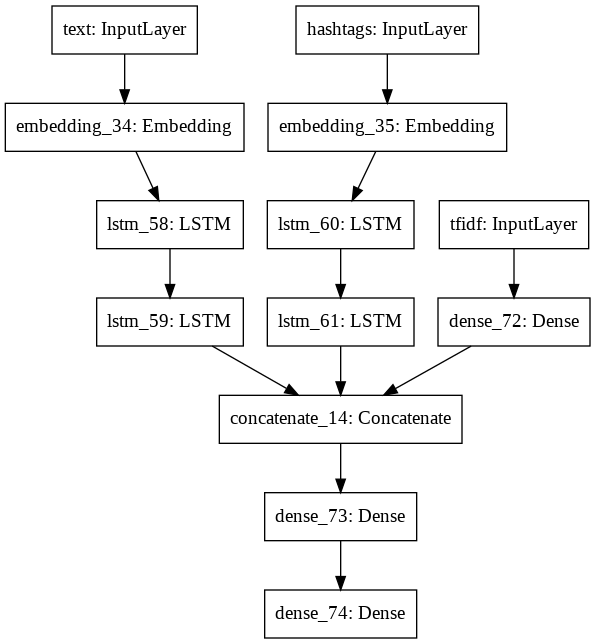

In [311]:
tf.keras.utils.plot_model(model_multi)

In [385]:
# Creating a compiler 
model_multi.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = [tf.keras.metrics.BinaryAccuracy()])

In [386]:
# Training the model
history_4 = model_multi.fit(x={"text": text_pad,
             "hashtags": hashtags_pad,
             "tfidf": tfidf_data},
          y=df_text["target"],
          validation_split = 0.3,
          batch_size = 16,
          epochs=15)


Epoch 1/15
334/334 [==============================] - 23s 49ms/step - loss: 0.6826 - binary_accuracy: 0.5689 - val_loss: 0.6671 - val_binary_accuracy: 0.5644
Epoch 2/15
334/334 [==============================] - 16s 47ms/step - loss: 0.6187 - binary_accuracy: 0.6349 - val_loss: 0.5069 - val_binary_accuracy: 0.7763
Epoch 3/15
334/334 [==============================] - 16s 48ms/step - loss: 0.3902 - binary_accuracy: 0.8453 - val_loss: 0.4892 - val_binary_accuracy: 0.7837
Epoch 4/15
334/334 [==============================] - 16s 48ms/step - loss: 0.3242 - binary_accuracy: 0.8804 - val_loss: 0.4980 - val_binary_accuracy: 0.7833
Epoch 5/15
334/334 [==============================] - 16s 47ms/step - loss: 0.2997 - binary_accuracy: 0.8882 - val_loss: 0.5071 - val_binary_accuracy: 0.7789
Epoch 6/15
334/334 [==============================] - 16s 48ms/step - loss: 0.2899 - binary_accuracy: 0.8928 - val_loss: 0.5145 - val_binary_accuracy: 0.7754
Epoch 7/15
334/334 [==============================] 

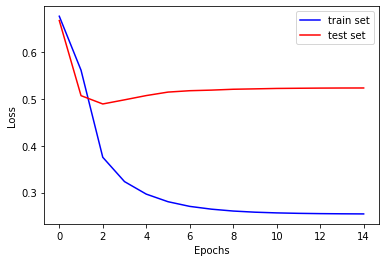

In [389]:
# Visualizing the training process on the loss function 
plt.plot(history_4.history["loss"], color="b", label = "train set")
plt.plot(history_4.history["val_loss"], color="r", label = "test set")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

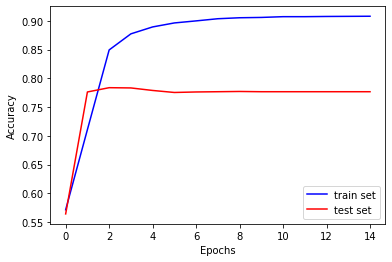

In [390]:
plt.plot(history_4.history["binary_accuracy"], color="b", label = "train set" )
plt.plot(history_4.history["val_binary_accuracy"], color="r", label = "test set")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()